<a href="https://colab.research.google.com/github/vifirsanova/compling/blob/main/word2vec/skip_gram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

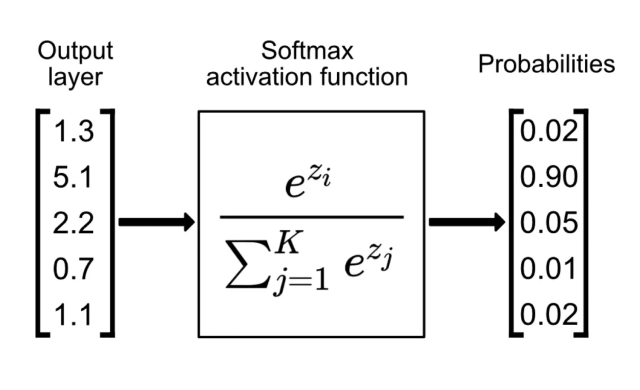

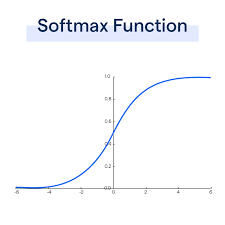

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

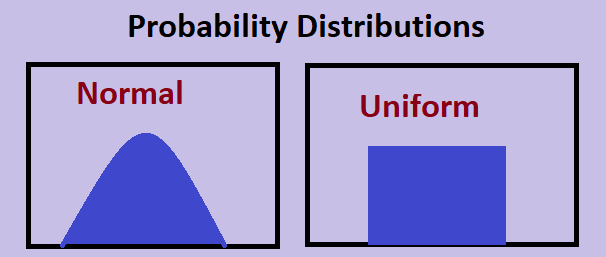

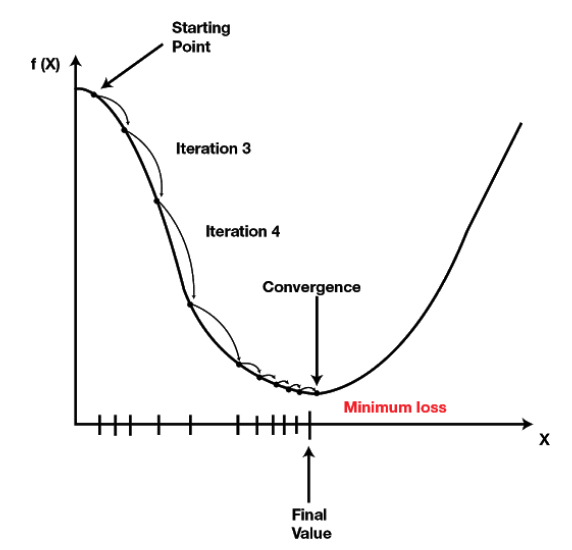

In [ ]:
class word2vec(object):
    def __init__(self):
        self.N = 10
        self.X_train = []
        self.y_train = []
        self.window_size = 2
        self.alpha = 0.001
        self.words = []
        self.word_index = {}

    def initialize(self,V,data):
        """
        Популируем равномерным распределением
        - каждому слову даем одинаковую вероятность

        По сути, создаем болванку для обучения,
        наполнения матрицы существенной информацией
        """
        self.V = V
        self.W = np.random.uniform(-0.8, 0.8, (self.V, self.N))
        self.W1 = np.random.uniform(-0.8, 0.8, (self.N, self.V))

        self.words = data
        for i in range(len(data)):
            self.word_index[data[i]] = i

    def feed_forward(self,X):
        """
        Предсказание: 'скормить данные' и сделать шаг вперед
        """
        self.h = np.dot(self.W.T,X).reshape(self.N,1)
        self.u = np.dot(self.W1.T,self.h)
        self.y = softmax(self.u)
        return self.y

    def backpropagate(self,x,t):
        """
        Обратное распространение ошибки:
        убедиться в том, что шаг сделан в нужную сторону,
        посчитать функцию потерь (насколько предсказания далеки от фактических распределений)
        """
        e = self.y - np.asarray(t).reshape(self.V,1)
        dLdW1 = np.dot(self.h,e.T)
        X = np.array(x).reshape(self.V,1)
        dLdW = np.dot(X, np.dot(self.W1,e).T)
        self.W1 = self.W1 - self.alpha*dLdW1
        self.W = self.W - self.alpha*dLdW

    def train(self,epochs):
        for x in range(1,epochs):
            self.loss = 0
            for j in range(len(self.X_train)):
                # обучение состоит из 2х шагов:
                # 1. сделать предсказание (перемножить матрицы)
                # 2. обратное распространение ошибки
                self.feed_forward(self.X_train[j])
                self.backpropagate(self.X_train[j],self.y_train[j])
                C = 0
                for m in range(self.V):
                    if(self.y_train[j][m]):
                        self.loss += -1*self.u[m][0]
                        C += 1
                self.loss += C*np.log(np.sum(np.exp(self.u)))
            print("epoch ",x, " loss = ",self.loss)
            self.alpha *= 1/( (1+self.alpha*x) )

    def predict(self,word,number_of_predictions):
        if word in self.words:
            index = self.word_index[word]
            X = [0 for i in range(self.V)]
            X[index] = 1
            prediction = self.feed_forward(X)
            output = {}
            for i in range(self.V):
                output[prediction[i][0]] = i

            top_context_words = []
            for k in sorted(output,reverse=True):
                top_context_words.append(self.words[output[k]])
                if(len(top_context_words)>=number_of_predictions):
                    break

            return top_context_words
        else:
            pass

In [ ]:
def preprocessing(corpus):
    stop_words = set(stopwords.words('english'))
    training_data = []
    sentences = corpus.split(".")
    for i in range(len(sentences)):
        sentences[i] = sentences[i].strip()
        sentence = sentences[i].split()
        x = [word.strip(string.punctuation) for word in sentence
                                     if word not in stop_words]
        x = [word.lower() for word in x]
        training_data.append(x)
    return training_data

In [ ]:
def prepare_data_for_training(sentences,w2v):
    data = {}
    for sentence in sentences:
        for word in sentence:
            if word not in data:
                data[word] = 1
            else:
                data[word] += 1
    V = len(data)
    data = sorted(list(data.keys()))
    vocab = {}
    for i in range(len(data)):
        vocab[data[i]] = i

    for sentence in sentences:
        for i in range(len(sentence)):
            center_word = [0 for x in range(V)]
            center_word[vocab[sentence[i]]] = 1
            context = [0 for x in range(V)]

            for j in range(i-w2v.window_size,i+w2v.window_size):
                if i!=j and j>=0 and j<len(sentence):
                    context[vocab[sentence[j]]] += 1
                    w2v.X_train.append(center_word)
                    w2v.y_train.append(context)
    w2v.initialize(V,data)

    return w2v.X_train,w2v.y_train

In [ ]:
corpus = ""

In [ ]:
corpus += "Alice found herself once again wandering through a peculiar wood, where every tree seemed to whisper secrets to the squirrels, and each blade of grass leaned just slightly as she passed, as if bowing in gentle curiosity. Ahead, a small but elegant table sat in a clearing, dressed in a lopsided linen cloth and surrounded by mismatched chairs."

In [ ]:
epochs = 1000

In [ ]:
training_data = preprocessing(corpus)
w2v = word2vec()

prepare_data_for_training(training_data,w2v)
w2v.train(epochs)

epoch  1  loss =  917.2114120040709
epoch  2  loss =  914.2492129922457
epoch  3  loss =  911.3088588403214
epoch  4  loss =  908.3926640265947
epoch  5  loss =  905.5028509734706
epoch  6  loss =  902.641539765942
epoch  7  loss =  899.8107389963294
epoch  8  loss =  897.0123378272509
epoch  9  loss =  894.2480993389986
epoch  10  loss =  891.5196552010667
epoch  11  loss =  888.8285016814731
epoch  12  loss =  886.1759969824582
epoch  13  loss =  883.5633598679237
epoch  14  loss =  880.9916695270538
epoch  15  loss =  878.4618666006023
epoch  16  loss =  875.9747552813682
epoch  17  loss =  873.531006388823
epoch  18  loss =  871.1311613095337
epoch  19  loss =  868.7756366899853
epoch  20  loss =  866.4647297662743
epoch  21  loss =  864.1986242158567
epoch  22  loss =  861.9773964195196
epoch  23  loss =  859.8010220267905
epoch  24  loss =  857.6693827246331
epoch  25  loss =  855.5822731171492
epoch  26  loss =  853.5394076327009
epoch  27  loss =  851.5404273841125
epoch  28  l

In [ ]:
w2v.predict("wood", 3)

['tree', 'dressed', 'elegant']

In [ ]:
data = 'sample text'

with open('text.txt', 'w') as f:
  f.write(data)